# Intro to ANN with Keras

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [7]:
iris = load_iris()

X = iris.data[:, (2,3)]
y = (iris.target==0).astype(np.int)

In [8]:
per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [9]:
y_pred

array([0])

# Implementation with Keras

In [10]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [11]:
tf.__version__

'2.3.0'

In [12]:
keras.__version__

'2.4.0'

In [13]:
fashion_mnist = keras.datasets.fashion_mnist

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [15]:
X_train_full.shape

(60000, 28, 28)

In [16]:
X_train_full.dtype

dtype('uint8')

In [17]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Coat


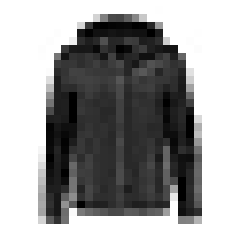

In [19]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off');
print(class_names[y_train[0]])

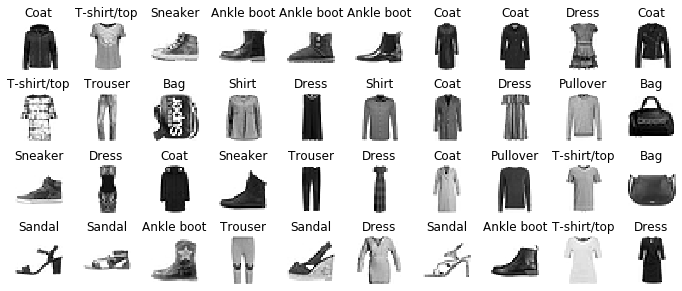

In [20]:
n_rows = 4
n_cols= 10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Multilayer perceptron model

In [21]:
# keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
# adding layers using a list
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense_7'

In [27]:
# model.get_layer('dense_9') is hidden1

In [28]:
weights, biases = hidden1.get_weights()
weights

array([[-0.05192226, -0.00818265, -0.03591891, ..., -0.07398766,
        -0.01248552,  0.03124472],
       [-0.02690778, -0.07395373,  0.06390628, ...,  0.00641933,
        -0.05103493, -0.02075779],
       [-0.05270337, -0.00267487, -0.01591761, ..., -0.02772184,
         0.05571282, -0.0206513 ],
       ...,
       [ 0.07158265, -0.04941539,  0.04076394, ...,  0.06002173,
         0.07243991, -0.017472  ],
       [ 0.05345955, -0.0425869 , -0.06807588, ...,  0.01057763,
         0.01495324, -0.01724556],
       [ 0.05728222, -0.06525678,  0.0020716 , ..., -0.01485393,
        -0.03919261,  0.00833143]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd', metrics=['accuracy'])

In [33]:
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7272 - accuracy: 0.7624 - val_loss: 0.5074 - val_accuracy: 0.8266
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4902 - accuracy: 0.8297 - val_loss: 0.4510 - val_accuracy: 0.8388
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4432 - accuracy: 0.8463 - val_loss: 0.4178 - val_accuracy: 0.8562
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4153 - accuracy: 0.8547 - val_loss: 0.4096 - val_accuracy: 0.8620
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3959 - accuracy: 0.8613 - val_loss: 0.3742 - val_accuracy: 0.8698
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3790 - accuracy: 0.8669 - val_loss: 0.3826 - val_accuracy: 0.8696
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3671 - accuracy: 0.8710 - val_loss: 0.3660 - val_accuracy:

In [34]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [35]:
history.history

{'loss': [0.7271971702575684,
  0.490200400352478,
  0.44318878650665283,
  0.4152626097202301,
  0.3958718478679657,
  0.3789876103401184,
  0.3671032786369324,
  0.3553447723388672,
  0.3453860878944397,
  0.3362741768360138],
 'accuracy': [0.7623999714851379,
  0.829727292060852,
  0.8463090658187866,
  0.8546545505523682,
  0.8613091111183167,
  0.8668909072875977,
  0.8709636330604553,
  0.8739091157913208,
  0.8764181733131409,
  0.8795636296272278],
 'val_loss': [0.5074142813682556,
  0.450989305973053,
  0.41775643825531006,
  0.4095601439476013,
  0.3742479383945465,
  0.38261595368385315,
  0.3660356104373932,
  0.36296072602272034,
  0.3585965931415558,
  0.33657804131507874],
 'val_accuracy': [0.8266000151634216,
  0.8388000130653381,
  0.8561999797821045,
  0.8619999885559082,
  0.8697999715805054,
  0.8695999979972839,
  0.8679999709129333,
  0.871399998664856,
  0.8695999979972839,
  0.8791999816894531]}

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

(0, 1)

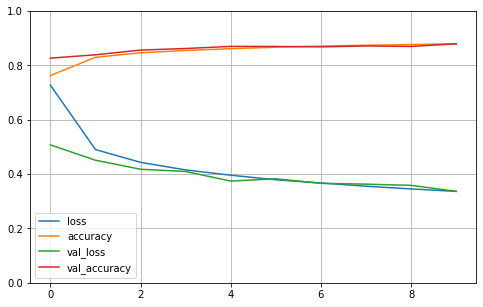

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 66.9647 - accuracy: 0.8291


[66.96469116210938, 0.8291000127792358]

In [39]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [40]:
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [42]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

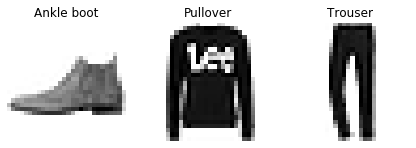

In [43]:
plt.figure(figsize=(3*2.4, 1*2.4))
for idx, image in enumerate(X_new):
    plt.subplot(1, 3, idx+1)
    plt.imshow(image, cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[idx]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

In [45]:
housing = fetch_california_housing()

In [46]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# model.compile(loss='mean_squared_error', optimizer='sgd')
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4875 - val_loss: 0.4656

In [49]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 970us/step - loss: 0.4212
0.4211779236793518


In [50]:
X_new = X_test[:3]
X_new.shape

(3, 8)

In [51]:
y_pred = model.predict(X_new)
y_pred

array([[0.3885665],
       [1.6792021],
       [3.1022792]], dtype=float32)

In [52]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

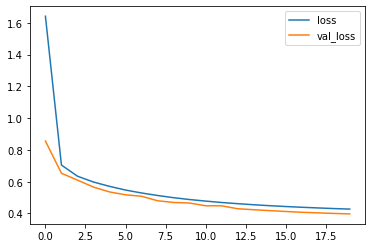

In [53]:
pd.DataFrame(history.history).plot()

# Complex models using Functional API

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [56]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           930         dense_12[0][0]                   
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_13[0][0]        

In [57]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
print(mse_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4659 - val_loss: 0.4313

# Different inputs via deep and shallow parts

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

model= keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [60]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                   validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
print(mse_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4644 - val_loss: 0.4315

# Aux output for regularization

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])

output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [62]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.1233 - main_output_loss: 4.1070 - aux_output_loss: 4.2699 - val_loss: 4.6962 - val_main_output_loss: 4.2781 - val_aux_output_loss: 8.4591
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5618 - main_output_loss: 1.3958 - aux_output_loss: 3.0558 - val_loss: 2.9504 - val_main_output_loss: 2.1815 - val_aux_output_loss: 9.8700
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0028 - main_output_loss: 0.8527 - aux_output_loss: 2.3533 - val_loss: 2.4689 - val_main_output_loss: 1.5745 - val_aux_output_loss: 10.5184
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8232 - main_output_loss: 0.6978 - aux_output_loss: 1.9520 - val_loss: 2.1756 - val_main_output_loss: 1.2900 - val_aux_output_loss: 10.1464
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7549 - main_output_loss: 0.6478 - aux_output_loss: 1.7188 - val_lo

In [64]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

162/162 [==============================] - 0s 1ms/step - loss: 0.6084 - main_output_loss: 0.5504 - aux_output_loss: 1.1305
[[0.84648037]
 [1.684804  ]
 [2.679947  ]] [[1.0609034]
 [1.5629395]
 [2.122662 ]]


# Dynamic Models

In [72]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel(30, activation='relu')

In [69]:
# class WideAndDeepModel(keras.models.Model):
#     def __init__(self, units=30, activation="relu", **kwargs):
#         super().__init__(**kwargs)
#         self.hidden1 = keras.layers.Dense(units, activation=activation)
#         self.hidden2 = keras.layers.Dense(units, activation=activation)
#         self.main_output = keras.layers.Dense(1)
#         self.aux_output = keras.layers.Dense(1)
        
#     def call(self, inputs):
#         input_A, input_B = inputs
#         hidden1 = self.hidden1(input_B)
#         hidden2 = self.hidden2(hidden1)
#         concat = keras.layers.concatenate([input_A, hidden2])
#         main_output = self.main_output(concat)
#         aux_output = self.aux_output(hidden2)
#         return main_output, aux_output

# model = WideAndDeepModel(30, activation="relu")

In [73]:
model.compile(loss='mse', loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [74]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10, 
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1210 - output_1_loss: 1.9986 - output_2_loss: 3.2225 - val_loss: 2.8539 - val_output_1_loss: 2.5208 - val_output_2_loss: 5.8515
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9263 - output_1_loss: 0.7926 - output_2_loss: 2.1300 - val_loss: 1.5743 - val_output_1_loss: 1.2249 - val_output_2_loss: 4.7190
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7806 - output_1_loss: 0.6730 - output_2_loss: 1.7492 - val_loss: 1.1348 - val_output_1_loss: 0.8106 - val_output_2_loss: 4.0528
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7027 - output_1_loss: 0.6126 - output_2_loss: 1.5139 - val_loss: 0.9375 - val_output_1_loss: 0.6529 - val_output_2_loss: 3.4992
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6474 - output_1_loss: 0.5703 - output_2_loss: 1.3416 - val_loss: 0.7974 - val_output_1_loss: 0.5528 - val_ou

In [75]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 1ms/step - loss: 0.5130 - output_1_loss: 0.4627 - output_2_loss: 0.9656


# Saving and Restoring

In [76]:
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [78]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [79]:
model.save('my_keras_model.h5')

In [ ]:
model.